# How to Replace Values With Regex in Pandas

In [1]:
import pandas as pd

df = pd.read_csv(f'../data/internshala_dataset_raw.csv')
df.head()

,internship,company_name,skills,perks,location,duration,stipend,applicants,ifSkillsorPerksMissingUseThis
0,Software Testing,Times Internet,Software Testing,"Certificate, 5 days a week",Noida,6 Months,8000 /month,119 applicants,"Software Testing, Certificate\n5 days a week"
1,Technical Operations - Networking And Monitoring,Paytm Payments Bank,"Java, SQL, Unix, Oracle, MS SQL Server, Hibern...","Certificate, Letter of recommendation, 5 days ...",Noida,6 Months,10000 /month,194 applicants,Java\nSQL\nUnix\nOracle\nMS SQL Server\nHibern...
2,Software Project Management,IIT Bombay,"English Proficiency (Spoken), English Proficie...","Certificate, Letter of recommendation, Flexibl...",Work From Home,6 Months,1000-2000 /month,113 applicants,English Proficiency (Spoken)\nEnglish Proficie...
3,Web Development,IIT Bombay,"HTML, CSS, Flask, Python, Django","Certificate, Letter of recommendation, Flexibl...",Work From Home,6 Months,1000-2000 /month,183 applicants,"HTML\nCSS\nFlask\nPython\nDjango, Certificate\..."
4,Front End Development,IIT Bombay,"HTML, CSS, JavaScript, ReactJS, Redux","Certificate, Letter of recommendation, Flexibl...",Work From Home,6 Months,1000-2000 /month,205 applicants,"HTML\nCSS\nJavaScript\nReactJS\nRedux, Certifi..."


## Step 2: Replace String Values with Regex in Column

### Replace single string value

In [2]:
df['applicants'].str.replace(r'\sapplicants', '', regex=True)

0                         119
1                         194
2                         113
3                         183
4                         205
                ...          
2562                       30
2563    Be an early applicant
2564    Be an early applicant
2565    Be an early applicant
2566    Be an early applicant
Name: applicants, Length: 2567, dtype: object

### Replace multiple string value

In [3]:
df['applicants'].str.replace(r'(\sapplicants|Be an early applicant)', '', regex=True)

0       119
1       194
2       113
3       183
4       205
       ... 
2562     30
2563       
2564       
2565       
2566       
Name: applicants, Length: 2567, dtype: object

### Replace multiple string values with different replacement

In [4]:
df['applicants'].replace([r'(\d+) applicants', 'Be an early applicant'],[r'\1',0], regex=True)

0       119
1       194
2       113
3       183
4       205
       ... 
2562     30
2563      0
2564      0
2565      0
2566      0
Name: applicants, Length: 2567, dtype: object

## Step 3: Regex replace with capture group

In [5]:
df['applicants'].replace(to_replace=r"([0-9,\.]+)(.*)", value=r"\1", regex=True)

0                         119
1                         194
2                         113
3                         183
4                         205
                ...          
2562                       30
2563    Be an early applicant
2564    Be an early applicant
2565    Be an early applicant
2566    Be an early applicant
Name: applicants, Length: 2567, dtype: object

## Step 4: Regex replace only special characters

In [6]:
df['internship'].str.replace(r'[^0-9a-zA-Z:,\s]+', '', regex=True)

0                                      Software Testing
1       Technical Operations  Networking And Monitoring
2                           Software Project Management
3                                       Web Development
4                                 Front End Development
                             ...                       
2562                             Internet Of Things IoT
2563                                    Summer Research
2564                 Academic Research Computer Science
2565                                   Computer Science
2566                                   Computer Science
Name: internship, Length: 2567, dtype: object

## Step 5: Regex replace numbers or non-digit characters

### Replace all non numeric symbols and map in case of missing

In [7]:
df['applicants'].str.replace(r'\D+', '', regex=True).replace({'':0}).astype('int')

0       119
1       194
2       113
3       183
4       205
       ... 
2562     30
2563      0
2564      0
2565      0
2566      0
Name: applicants, Length: 2567, dtype: int64

<AxesSubplot:>

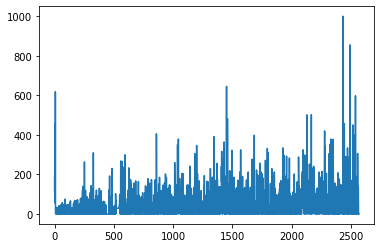

In [8]:
df['applicants'].str.replace(r'\D+', '', regex=True).replace({'':0}).astype('int').plot()

### Replace all numbers from Pandas column

In [9]:
df['applicants'].replace(to_replace=r"\d+", value=r" ", regex=True)

0                  applicants
1                  applicants
2                  applicants
3                  applicants
4                  applicants
                ...          
2562               applicants
2563    Be an early applicant
2564    Be an early applicant
2565    Be an early applicant
2566    Be an early applicant
Name: applicants, Length: 2567, dtype: object

## Step 6: Regex replace all values in DataFrame

In [10]:
cols = ['stipend', 'applicants', 'internship', 'duration']
df[cols].replace(to_replace=r"\d+", value=r" ", regex=True)

,stipend,applicants,internship,duration
0,/month,applicants,Software Testing,Months
1,/month,applicants,Technical Operations - Networking And Monitoring,Months
2,- /month,applicants,Software Project Management,Months
3,- /month,applicants,Web Development,Months
4,- /month,applicants,Front End Development,Months
...,...,...,...,...
2562,- /month,applicants,Internet Of Things (IoT),Months
2563,/month,Be an early applicant,Summer Research,Months
2564,Not provided,Be an early applicant,Academic Research (Computer Science),Months
2565,/month,Be an early applicant,Computer Science,Months
